In [1]:
# import libraries
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv("../data/raw/nigeria_medical_insurance.csv")
df.head()

,Age,Gender,BMI,Children,Smoker?,State,Hospital_Bill
0,47yrs,Male,45.3kg/m2,none,Yes,Rivers,₦12854792.7
1,33.0,Female,"22.7,","0,",N,Kaduna,₦32976705.91
2,"64,",F,39.0,none,yes,Lagos,"24,127,691"
3,age_36,M,28.9,"3,",?,Oyo,"10,122,887"
4,"49,",Female,"42.7,",2.0,Yes,KANO,NaN


In [3]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1472 non-null   object
 1    Gender        1304 non-null   object
 2   BMI            1472 non-null   object
 3   Children       1233 non-null   object
 4   Smoker?        1472 non-null   object
 5    State         1472 non-null   object
 6   Hospital_Bill  1250 non-null   object
dtypes: object(7)
memory usage: 80.6+ KB


In [4]:
# check for missing values
df.isnull().sum()

Age                0
 Gender          168
BMI                0
Children         239
Smoker?            0
 State             0
Hospital_Bill    222
dtype: int64

In [5]:
# drop missing values
# df.dropna(inplace=True)

In [6]:
df["Age "].unique()

array(['47yrs', '33.0', '64,', 'age_36', '49,', '34,', '28yrs', 'age_62',
       '?', '31yrs', 'age_57', '44,', '59,', '18yrs', 'age_60', 'age_19',
       'age_22', ' 32 ', ' 19 ', '21yrs', '48.0', '50.0', '51yrs',
       '40yrs', '64yrs', '34yrs', '37yrs', '62,', '27,', ' 37 ', ' 21 ',
       ' 28 ', 'age_28', ' 38 ', '29,', '28,', '18.0', 'age_23', '62.0',
       '61.0', 'age_44', '63yrs', ' 63 ', 'age_35', ' 40 ', '37.0',
       '26.0', '20,', '54.0', '53.0', 'age_56', '44yrs', ' 54 ', ' 25 ',
       '25,', '27.0', '38,', 'age_30', ' 52 ', 'age_51', '42,', '43,',
       '46,', '44.0', '41,', ' 62 ', 'age_25', '19.0', '34.0', '48,',
       '52,', '19yrs', 'age_21', ' 47 ', ' 44 ', '41.0', '60yrs', '20.0',
       'age_58', '18,', '40,', '35.0', '59yrs', ' 26 ', 'age_26', '31,',
       ' 53 ', '57.0', ' 43 ', 'age_33', '57yrs', '58.0', '49.0', ' 35 ',
       ' 33 ', '54yrs', '31.0', ' 42 ', '25.0', '24yrs', '39.0', '47.0',
       ' 45 ', 'age_31', 'age_49', 'age_48', ' 24 ', ' 22 ', '5

In [7]:
# cleaning the age column
def clean_age(x):
    if isinstance(x, str):
        x = x.replace("yrs", "")
        x = x.replace("age_", "")
        x = x.replace(",", "")
        x = x.replace(".0", "")
        x = x.strip()
        try:
            return int(x)
        except ValueError:
            return np.nan
    return (x)

df["Age "] = df["Age "].apply(clean_age)
df["Age "] = df["Age "].astype("Int64")
df.rename(columns={"Age ": "age"}, inplace=True)
df.head()

,age,Gender,BMI,Children,Smoker?,State,Hospital_Bill
0,47,Male,45.3kg/m2,none,Yes,Rivers,₦12854792.7
1,33,Female,"22.7,","0,",N,Kaduna,₦32976705.91
2,64,F,39.0,none,yes,Lagos,"24,127,691"
3,36,M,28.9,"3,",?,Oyo,"10,122,887"
4,49,Female,"42.7,",2.0,Yes,KANO,NaN


In [8]:
df["age"].unique()

<IntegerArray>
[  47,   33,   64,   36,   49,   34,   28,   62, <NA>,   31,   57,   44,   59,
   18,   60,   19,   22,   32,   21,   48,   50,   51,   40,   37,   27,   38,
   29,   23,   61,   63,   35,   26,   20,   54,   53,   56,   25,   30,   52,
   42,   43,   46,   41,   58,   24,   39,   45,   55]
Length: 48, dtype: Int64

In [9]:
df[" Gender"].unique()

array(['Male', 'Female', 'F', 'M', 'unknown', 'fem', nan, 'male'],
      dtype=object)

In [10]:
# cleaning the gender column
df[" Gender"].replace({
    "F": "Female",
    "M": "Male",
    "fem": "female",
    "male": "Male",
    "unknown": np.nan
}, inplace=True)
df[" Gender"] = df[" Gender"].str.strip()
df.rename(columns={" Gender": "gender"}, inplace=True)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8728\2913995250.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[" Gender"].replace({


,age,gender,BMI,Children,Smoker?,State,Hospital_Bill
0,47,Male,45.3kg/m2,none,Yes,Rivers,₦12854792.7
1,33,Female,"22.7,","0,",N,Kaduna,₦32976705.91
2,64,Female,39.0,none,yes,Lagos,"24,127,691"
3,36,Male,28.9,"3,",?,Oyo,"10,122,887"
4,49,Female,"42.7,",2.0,Yes,KANO,NaN


In [11]:
df["BMI"].unique()

array(['45.3kg/m2', '22.7,', ' 39.0 ', '28.9', '42.7,', '33.2', 'unknown',
       ' 39.2 ', ' 29.7 ', '34.3,', '??', '36.5kg/m2', '18.3', ' 30.1 ',
       ' 35.6 ', ' 31.1 ', '41.1kg/m2', '32.3kg/m2', '31.4kg/m2', '27.4,',
       '24.4', '38.0', '17.9kg/m2', ' 36.2 ', '26.7kg/m2', '34.9,',
       '30.5', '34.8,', '35.4', '40.6,', '38.8,', ' 37.1 ', '34.4,',
       '23.8,', ' 31.2 ', '25.0', '37.0,', '35.1kg/m2', ' 36.3 ',
       '30.6kg/m2', '30.1', '23.2,', '46.5kg/m2', '29.7kg/m2', '25.3',
       '30.2', '27.9,', '29.1kg/m2', '32.2,', '28.5kg/m2', '36.9,',
       '27.4', '21.1', '46.8', '42.9kg/m2', ' 29.0 ', '21.8kg/m2',
       '30.8,', '24.7,', ' 37.4 ', '35.0', ' 30.5 ', '35.6kg/m2',
       ' 21.7 ', '24.3kg/m2', ' 29.6 ', '27.8', '28.0', '33.3,',
       '25.7kg/m2', '23.6', '27.5kg/m2', '31.6,', '28.3,', '27.6,',
       '31.5', '29.6', '35.6', '32.0,', '29.6,', '33.0,', ' 27.7 ',
       '37.4,', '28.8,', '36.4kg/m2', '19.2kg/m2', '27.8,', '32.4',
       '21.4', '22.2', '32.9', '2

In [12]:
# cleaning the bmi column
def clean_bmi(x):
    if isinstance(x, str):
        x = x.replace("kg/m2", "")
        x = x.replace(" ", "")
        x = x.replace(",", "")
        # x = x.replace("??", "nan")
        x = x.replace("unknown", "nan")
        x = x.strip()
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

df["BMI"] = df["BMI"].apply(clean_bmi)
df.rename(columns={"BMI": "bmi"}, inplace=True)
df.head()

,age,gender,bmi,Children,Smoker?,State,Hospital_Bill
0,47,Male,45.3,none,Yes,Rivers,₦12854792.7
1,33,Female,22.7,"0,",N,Kaduna,₦32976705.91
2,64,Female,39.0,none,yes,Lagos,"24,127,691"
3,36,Male,28.9,"3,",?,Oyo,"10,122,887"
4,49,Female,42.7,2.0,Yes,KANO,NaN


In [13]:
df["Children "].unique()

array(['none', '0,', '3,', '2.0', '1', '2', nan, 'three', '1,', '0',
       '0.0', '1.0', '3.0', '5.0', '2,', '5,', '3', '4', '4,', '5', '4.0'],
      dtype=object)

In [14]:
# cleaning the children column
def clean_children(x):
    if isinstance(x, str):
        x = x.replace("three", "3")
        x = x.replace(",", "")
        x = x.replace(".0", "")
        x = x.replace("none", "0")
        x = x.strip()
        try:
            return int(x)
        except ValueError:
            return np.nan
    return x

df["Children "] = df["Children "].apply(clean_children)
df.rename(columns={"Children ": "children"}, inplace=True)
df.head()

,age,gender,bmi,children,Smoker?,State,Hospital_Bill
0,47,Male,45.3,0.0,Yes,Rivers,₦12854792.7
1,33,Female,22.7,0.0,N,Kaduna,₦32976705.91
2,64,Female,39.0,0.0,yes,Lagos,"24,127,691"
3,36,Male,28.9,3.0,?,Oyo,"10,122,887"
4,49,Female,42.7,2.0,Yes,KANO,NaN


In [15]:
df["Smoker?"].unique()

array(['Yes', 'N', 'yes', '?', 'No', 'smoker', 'Y', 'no', 'non-smoker'],
      dtype=object)

In [16]:
# cleaning the smoker column
df["Smoker?"] = df["Smoker?"].str.capitalize()
df["Smoker?"].replace({
    "N": "No",
    "Y": "Yes",
    "?": np.nan,
    "Non-smoker": "No",
    "Smoker": "Yes"
}, inplace=True)
df["Smoker?"] = df["Smoker?"].str.strip()
df.rename(columns={"Smoker?": "smoker"}, inplace=True)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8728\4015129272.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Smoker?"].replace({


,age,gender,bmi,children,smoker,State,Hospital_Bill
0,47,Male,45.3,0.0,Yes,Rivers,₦12854792.7
1,33,Female,22.7,0.0,No,Kaduna,₦32976705.91
2,64,Female,39.0,0.0,Yes,Lagos,"24,127,691"
3,36,Male,28.9,3.0,NaN,Oyo,"10,122,887"
4,49,Female,42.7,2.0,Yes,KANO,NaN


In [17]:
df[" State "].unique()

array(['Rivers', 'Kaduna', ' Lagos ', 'Oyo', 'KANO', 'Abuja', 'Lagos',
       'Kano', 'abuja', 'Enugu', '?'], dtype=object)

In [18]:
# cleaning the state column
df[" State "].replace({
    "?": np.nan
}, inplace=True)
df[" State "] = df[" State "].str.strip()
df[" State "] = df[" State "].str.capitalize()
df.rename(columns={" State ": "state"}, inplace=True)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8728\467730186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[" State "].replace({


,age,gender,bmi,children,smoker,state,Hospital_Bill
0,47,Male,45.3,0.0,Yes,Rivers,₦12854792.7
1,33,Female,22.7,0.0,No,Kaduna,₦32976705.91
2,64,Female,39.0,0.0,Yes,Lagos,"24,127,691"
3,36,Male,28.9,3.0,NaN,Oyo,"10,122,887"
4,49,Female,42.7,2.0,Yes,Kano,NaN


In [19]:
df["state"].unique()

array(['Rivers', 'Kaduna', 'Lagos', 'Oyo', 'Kano', 'Abuja', 'Enugu', nan],
      dtype=object)

In [20]:
df["Hospital_Bill"].unique()

array(['₦12854792.7', '₦32976705.91', '24,127,691', ..., '18,973,055',
       '2298704.55 NGN', '17615901.15 NGN'], shape=(1140,), dtype=object)

In [21]:
# cleaning the hospital bill column
def clean_bill(x):
    if isinstance(x, str):
        x = x.replace("₦", "")
        x = x.replace("NGN", "")
        x = x.replace(",", "")
        x = x.replace("none", "0")
        return float(x.strip())
    return x

df["Hospital_Bill"] = df["Hospital_Bill"].apply(clean_bill)
df.rename(columns={"Hospital_Bill": "hospital_bill"}, inplace=True)
df.head()

,age,gender,bmi,children,smoker,state,hospital_bill
0,47,Male,45.3,0.0,Yes,Rivers,12854792.70
1,33,Female,22.7,0.0,No,Kaduna,32976705.91
2,64,Female,39.0,0.0,Yes,Lagos,24127691.00
3,36,Male,28.9,3.0,NaN,Oyo,10122887.00
4,49,Female,42.7,2.0,Yes,Kano,NaN


In [22]:
# check for missing values
df.isnull().sum()

age              260
gender           360
bmi              488
children         239
smoker           144
state            143
hospital_bill    222
dtype: int64

In [23]:
# filling missing values
df["bmi"] = df["bmi"].fillna(df["bmi"].median())
df["age"] = df["age"].fillna(df["age"].median())
df["children"] = df["children"].fillna(df["children"].median())
df["gender"] = df["gender"].fillna(df["gender"].mode()[0])

In [24]:
# dropping missing values
df = df.dropna(subset=["smoker", "state", "hospital_bill"])

In [25]:
df.isnull().sum()

age              0
gender           0
bmi              0
children         0
smoker           0
state            0
hospital_bill    0
dtype: int64

In [26]:
# check for duplicates
df.duplicated().sum()

np.int64(89)

In [27]:
# drop duplicates
df = df.drop_duplicates()

In [28]:
# check for outliers
num_cols = df[["age", "bmi", "children", "hospital_bill"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

age                0
bmi              152
children           0
hospital_bill    105
dtype: Int64

In [29]:
df[["bmi", "hospital_bill"]].describe()

,bmi,hospital_bill
count,927.000000,9.270000e+02
mean,30.735653,1.958856e+07
std,4.950167,1.809975e+07
min,16.000000,1.697260e+06
25%,28.800000,7.123060e+06
50%,30.450000,1.389720e+07
75%,32.400000,2.330503e+07
max,53.100000,9.565564e+07


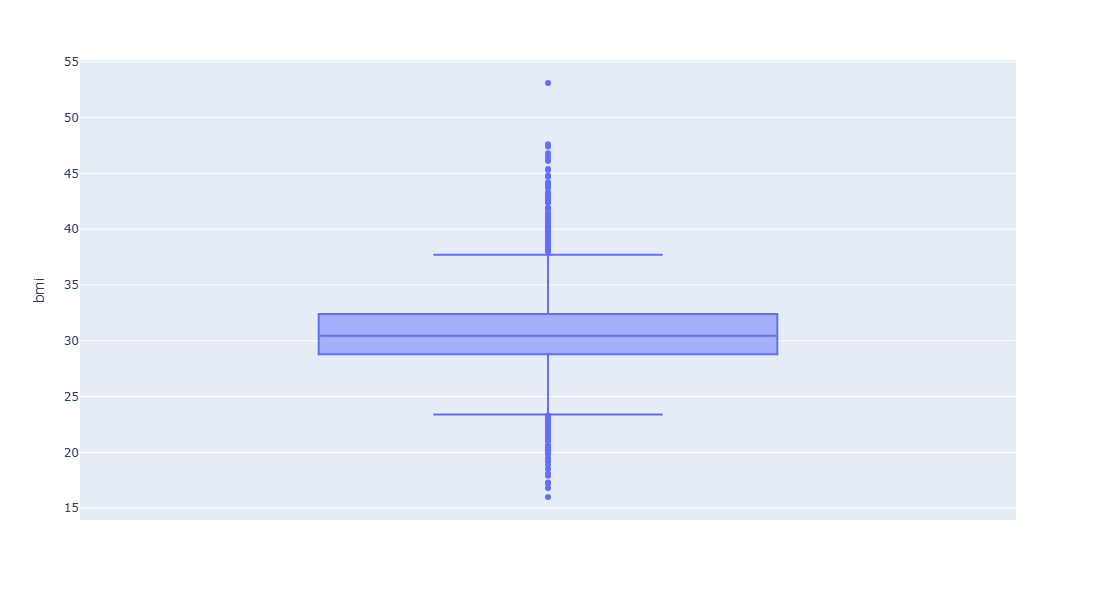

In [30]:
# using boxplot to visualize oulier for the "Total Revenue" feature
fig = px.box(
    df,
    y="bmi",
    title="",
    width=600,
    height=600
    # yaxis_title= "Numerical Features",
    # vert=False
)
fig.show()

In [31]:
# df = df[(df["bmi"] >= 25) & (df["bmi"] <= 35)]
# df = df[(df["hospital_bill"] <= 30_000_000)]
# # df = df[df["bmi"] <= 35]

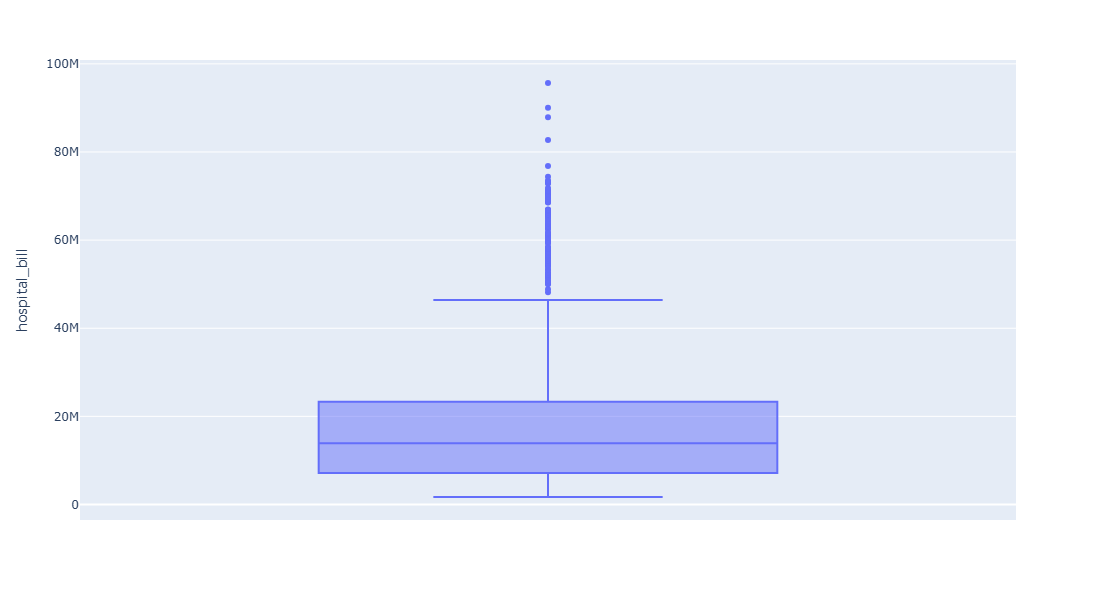

In [32]:
# using boxplot to visualize oulier for the "Total Revenue" feature
fig = px.box(
    df,
    y="hospital_bill",
    title="",
    width=600,
    height=600
    # yaxis_title= "Numerical Features",
    # vert=False
)
fig.show()

In [33]:
# # check for outlier
# # check for outliers
# num_cols = df[["age", "bmi", "children", "hospital_bill"]]
# q1 = num_cols.quantile(0.25)
# q3 = num_cols.quantile(0.75)

# iqr = q3 - q1

# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
# outliers.sum()

In [34]:
df.shape

(927, 7)

In [35]:
df.to_csv("../data/cleaned/cleaned_nigeria_medical_insurance.csv", index=False )